In [1]:
from synthlisa import *

In [2]:
import math
import numpy
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
L = 16.6782
originallisa = OriginalLISA(L)

In [4]:
samples = 2**18 # 2**18 takes 11 s on a 1.25GHz
stime = 1

patches = 256

In [5]:
originalTDI = TDInoise(originallisa,
                       1.0, 2.5e-48, # proof-mass noise parameters
                       1.0, 1.8e-37, # optical-path noise parameters
                       1.0, 1.1e-26) # laser frequency noise parameters

In [6]:
originalTDI.Xm(0)

-8.335901537298608e-20

In [7]:
noiseX = getobsc(samples,stime,originalTDI.Xm)

...completed in 1 s [170286 (multi)samples/s].                           


In [8]:
myspecX = spect(noiseX,stime,patches)

In [9]:
fmin = myspecX[1,0]
fmax = myspecX[-1,0]

In [10]:
f = numpy.arange(fmin,fmax,(fmax-fmin)/999,'d')

In [11]:
Syproof = 2.5e-48 * f**-2
Syopt = 1.8e-37 * f**2

In [12]:
theoryX = (8*numpy.sin(4*math.pi*f*L)**2 + 32*numpy.sin(2*math.pi*f*L)**2) * Syproof + \
          16*numpy.sin(2*math.pi*f*L)**2 * Syopt

In [13]:
myspecX.shape

(513, 2)

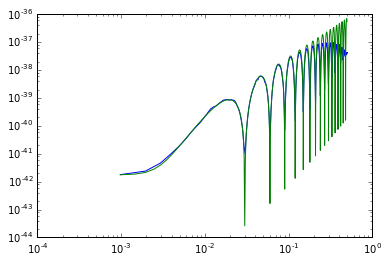

In [14]:
pp.loglog(myspecX[:,0],myspecX[:,1])
pp.loglog(f,theoryX)

There's still the issue of the renaming of TDInoise to _TDInoise so there's a factory. Perhaps handle it at the C++ level. 

Reproducing this script.

In [3]:
!cat test-tdiequal-X.py

#!/usr/bin/env python

# test of first-generation TDI X noise against the theoretical expression

# this script demonstrates the generation of a TDI X time series, and
# in particular:
# - creating a LISA geometry object
# - creating a TDInoise object based on standard pseudorandom noises
# - calling getobs to get an array of X values at equispaced times
# - getting the spectrum of the time series
# - writing the spectrum to disk
# - using some Python/numpy magic to create a theoretical X spectrum

# import all the libraries that are needed

from synthlisa import *

# we create a LISA geometry object corresponding to a stationary LISA
# with equal armlengths

L = 16.6782
originallisa = OriginalLISA(L)

# we create a TDInoise object based on the LISA geometry object, and
# on 18 (6+6+6) pseudorandom noise objects with standard parameters
# (the exponents are implicitly -2.0, 2.0, and 0.0; the interpolation
# windows are 1; the sampling time of the noise needs to be the same,
# or lower 